## <center>Problem Sheet #2</center>



### General second order linear two-point BVP with Dirichlet boundary condition<br>

<b>Problem 1.</b> Let us analyze the given two-point BVP program and let us apply the first two problems of Problem Sheet #1!

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import diags
from scipy.sparse.linalg import spsolve

def twopointBVP(inta, intb, alpha, beta, N):
    """
    Numerical solution for two-point BVPs:
        a(t) u''(t) + b(t) u'(t) + c(t) u(t) = f(t)
        u(inta) = alpha,  u(intb) = beta
    """

    # Problem-specific functions (can be customized)
    f  = lambda t:  ....     # Right-hand side function
    a1 = lambda t:   ....    # Coefficient a(t)
    b1 = lambda t:   ....    # Coefficient b(t)
    c1 = lambda t:   ....    # Coefficient c(t)

    # Step size
    h = (intb - inta) / (N + 1)

    # Interior grid
    t = inta + h * np.arange(1, N + 1)

    # Coefficients evaluated at grid points
    a = a1(t)
    b = b1(t)
    c = c1(t)

    # Build tridiagonal matrix
    lower_diag = ((a - 0.5 * h * b) / h**2)[1:]   # N-1 elements
    main_diag  = (-2 * a + h**2 * c) / h**2       # N elements
    upper_diag = ((a + 0.5 * h * b) / h**2)[:-1]  # N-1 elements

    A_h = diags([lower_diag, main_diag, upper_diag], offsets=[-1, 0, 1], format='csr')
    print(np.size(A_h))
    print(np.size(t))
    # Right-hand side
    f_h = f(t)
    f_h[0] -= alpha * (a[0] / h**2 - b[0] / (2*h))
    f_h[-1] -= beta  * (a[-1] / h**2 + b[-1] / (2*h))

    # Solve system
    y_inner = spsolve(A_h, f_h)

    # Add boundary values
    y_full = np.zeros(N+2)
    y_full[0] = alpha
    y_full[-1] = beta
    y_full[1:-1] = y_inner

    # Full grid (including endpoints)
    x_i = np.linspace(inta, intb, N+2)
    
    # Plot
    plt.plot(x_i, y_full, 'r+', label='Numerical solution')
    plt.xlabel('x')
    plt.ylabel('u(x)')
    plt.legend()
    plt.grid()
    plt.show()
    
    

    return x_i, y_full

SyntaxError: invalid syntax (463565676.py, line 14)

49
17


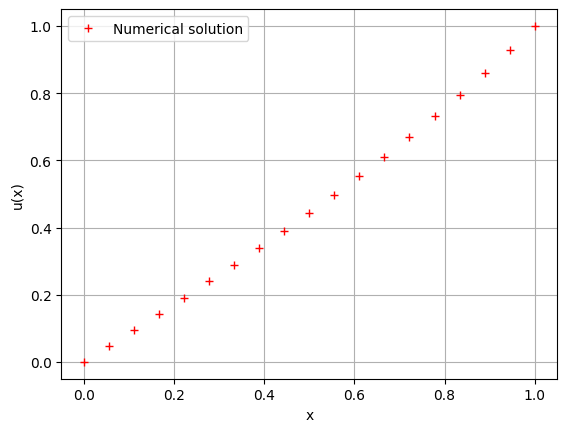

In [39]:
[x_h,y_h]=twopointBVP(0,1,0,1,17);

<b>Problem 2.</b>  Let us consider the example from the seminar in the reduced case. Give an estimate for $||A_h^{-1}||_{\infty}$ in case of the given dominant vector!

### Poisson equation in 2D
#### Homogeneous Dirichlet boundary condition and the five-point stencil

Problem 1. Let us consider the Poisson equation on the domain $\Omega=(0,1)\times(0,1)$ with homogeneous Dirichlet boundary condition, i.e.
\begin{cases}
-\Delta u= f\quad \textrm{in}\ \Omega\\
u\big|_{\Gamma}=0, &
\end{cases}
where $f(x,y)=\sin(\pi x)\sin(2\pi y)$. Let us apply the standard difference star (five-point stencil) with the same step size in both direction.

Max of numerical solution: 0.020320


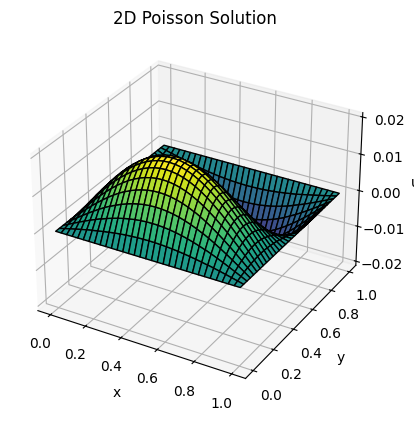

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import diags, eye, kron
from scipy.sparse.linalg import spsolve

# Parameters
N = 31  # Number of interior grid points
h = 1 / (N + 1)

# Construct the 1D Laplacian B
e = np.ones(N)
B = diags([-e, 2*e, -e], offsets=[-1, 0, 1], shape=(N, N))

# Construct the 2D Laplacian using Kronecker products
I = eye(N)
A_h = ....

# Grid points (interior only)
x = np.linspace(h, 1 - h, N)
xi, yj = np.meshgrid(x, x)

# Right-hand side function
fsquare = ....
f = fsquare.reshape(N**2)

# Solve the linear system
yv = spsolve(A_h, f)
print(f"Max of numerical solution: {np.max(yv):.6f}")

# Reshape back into an NxN grid
ysquare = yv.reshape((N, N))

# Pad with zeros for Dirichlet boundaries
y = np.zeros((N + 2, N + 2))
y[1:-1, 1:-1] = ysquare

# Plot (rotatable surface)
X, Y = np.meshgrid(np.linspace(0, 1, N+2), np.linspace(0, 1, N+2))
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, y, cmap='viridis', edgecolor='k')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('u')
ax.set_title('2D Poisson Solution')
plt.show()


<b>Problem 3.</b> Let us modify Problem 1 such that $\Omega=(0,4)\times(0,1)$ and $h_1\neq h_2$.

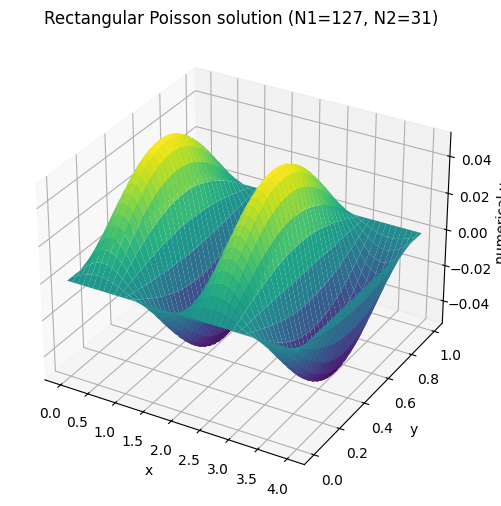

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import diags, kron, eye
from scipy.sparse.linalg import spsolve

# Parameters (your values)
N1 = 127   # interior points in x
N2 = 31    # interior points in y
h1 = 4.0 / (N1 + 1)
h2 = 1.0 / (N2 + 1)

# 1D Laplacians for x and y (different sizes!)
ex = np.ones(N1)
ey = np.ones(N2)
Bx = diags([-ex, 2*ex, -ex], offsets=[-1, 0, 1], shape=(N1, N1))
By = diags([-ey, 2*ey, -ey], offsets=[-1, 0, 1], shape=(N2, N2))

# 2D operator: ....
A = ....
A = A.tocsr()  # sparse CSR for efficient solves

# Interior grid (use linspace to avoid fp accumulation)
x = np.linspace(h1, 4.0 - h1, N1)   # length N1
y = np.linspace(h2, 1.0 - h2, N2)   # length N2
xi, yj = np.meshgrid(x, y)          # shape (N2, N1): rows -> y, cols -> x

# Right-hand side f(x,y)
fsquare = np.sin(np.pi * xi) * np.sin(np.pi * yj)  # shape (N2, N1)

# This matches the kron ordering I ⊗ Bx  +  By ⊗ I
f = fsquare.flatten(order='C')  # 1D array length N1*N2

# Solve
yv = spsolve(A, f)


# Put solution back to 2D grid (row-major)
ysquare = yv.reshape((N2, N1))  # shape (N2, N1)

# Pad with zeros for Dirichlet boundary and prepare for plotting
y_full = np.zeros((N2 + 2, N1 + 2))
y_full[1:-1, 1:-1] = ysquare

# Meshgrid for plotting (X,Y shapes must match y_full)
X, Y = np.meshgrid(np.linspace(0, 4, N1 + 2), np.linspace(0, 1, N2 + 2))

# Plot rotatable 3D surface (use %matplotlib notebook or widget in Jupyter)
fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, y_full, cmap='viridis', edgecolor='none')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('numerical u')
ax.set_title('Rectangular Poisson solution (N1=%d, N2=%d)' % (N1, N2))
plt.show()

<b>Problem 4.</b> Let us consider the Poisson equation on domain $\Omega=(0,1)\times(0,1)$, i.e.
\begin{cases}
-\Delta u= f\quad \Omega\textrm{-n}\\
u\big|_{\Gamma}=g, &
\end{cases}
where $f(x,y)=\sin(\pi x)(2+(1-y^2)\pi^2)$ and on the boundary we have the condition $u(x,0)=sin(\pi x)$. Then the true solution is $u(x,y)=(1-y^2)\sin(\pi x)$. Let us apply the five-point stencil with the same step size in both direction. What can we experience by increasing the number of the subintervals? What is the order of the method?

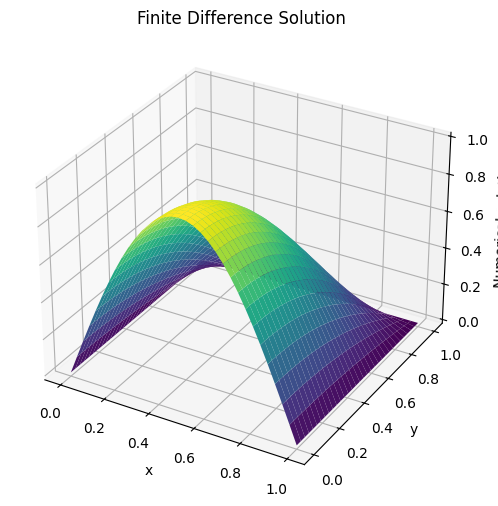

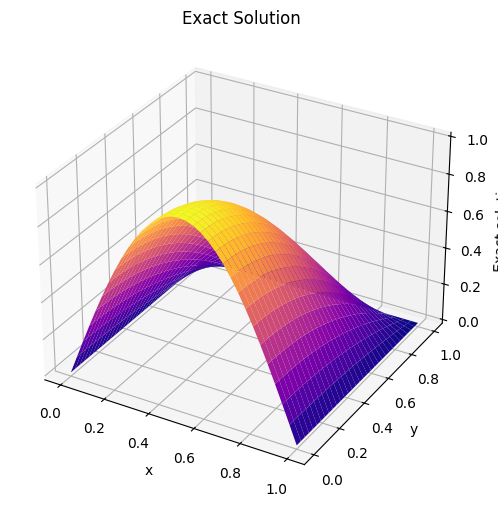

Max-norm error = 3.563449e-04


In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import diags, kron, eye
from scipy.sparse.linalg import spsolve

# Parameters
N = 31
h = 1 / (N + 1)

# Build block matrices
e = np.ones(N)
B = diags([-e, 2*e, -e], offsets=[-1, 0, 1], shape=(N, N))
I = eye(N)

# Full matrix A_h (N^2 x N^2)
A_h = (1 / h**2) * (kron(I, B) + kron(B, I))
A_h = A_h.tocsr()

# Interior grid
x = np.linspace(h, 1 - h, N)
y = np.linspace(h, 1 - h, N)
xi, yj = np.meshgrid(x, y)

# Right-hand side f
fsquare = np.sin(np.pi * xi) * (2 + (1 - yj**2) * np.pi**2)

# Add boundary contribution (y=0 boundary)
g = .....
fsquare[0,:] = .....

# Flatten with column-major order 
f = fsquare.flatten(order='C')


# Solve
yv = spsolve(A_h, f)

# Reshape back into N x N interior solution
ysquare = yv.reshape((N, N), order='C')  

# Insert interior solution into full grid including boundaries
y_full = np.zeros((N + 2, N + 2))
y_full[1:N+1, 1:N+1] = ysquare

# Put boundary values back on y=0
y_full[0, :] = np.sin(np.pi * h * np.arange(0, N + 2))

# Plot numerical solution
X, Y = np.meshgrid(np.linspace(0, 1, N + 2), np.linspace(0, 1, N + 2))
fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, y_full, cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('Numerical solution')
ax.set_title('Finite Difference Solution')
plt.show()

# Exact solution
xexact, yexact = np.meshgrid(np.linspace(0, 1, N + 2), np.linspace(0, 1, N + 2))
exact = np.sin(np.pi * xexact) * (1 - yexact**2)

# Plot exact solution
fig2 = plt.figure(figsize=(9, 6))
ax2 = fig2.add_subplot(111, projection='3d')
ax2.plot_surface(xexact, yexact, exact, cmap='plasma')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('Exact solution')
ax2.set_title('Exact Solution')
plt.show()

# Compute max-norm error
norm_maxmax = np.max(np.abs(y_full - exact))
print(f"Max-norm error = {norm_maxmax:.6e}")